# <h1 align = "center">Titanic Data Cleaning</h1>

<h2 align = "center">Cloud Computing Project - Predict Titanic Survivor</h2>
<h4 align = "center">ROULET Maria Paula - ROUX Dorian</h4>

---

## Import the Required Packages

In [1]:
#Import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

## Import the Train & Test Data Sets

In [2]:
titanic_train = pd.read_csv('Datasets/Pre_Cleaning/train.csv')
titanic_test = pd.read_csv('Datasets/Pre_Cleaning/test.csv')

In [4]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

### 1° - Check Missing Values

In [5]:
print(titanic_train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print(titanic_test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


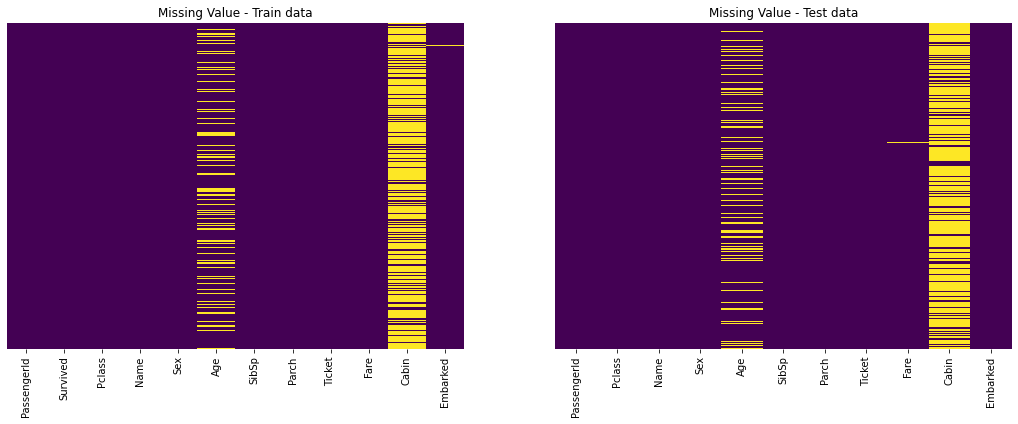

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(titanic_train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Missing Value - Train data')

# test data
sns.heatmap(titanic_test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Missing Value - Test data')

plt.show()

### 2° - Fill the Missing Values

#### Embarked feature in Train

In [9]:
#Check how many Ports of Embarkation are in the "Embarked" column
print(titanic_train.Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [10]:
#Fill the missing value with the port of highest embarkation
titanic_train["Embarked"] = titanic_train["Embarked"].replace(np.nan,Counter(titanic_train["Embarked"]).most_common(1)[0][0])

In [11]:
#Check how many Ports of Embarkation are in the updated "Embarked" column
print(titanic_train.Embarked.value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [12]:
#Check the number of missing value in the updated 'Embarked' column of the train data set
print("Missing Value in the 'Embarked' column of the train data set:", titanic_train["Embarked"].isna().sum())

Missing Value in the 'Embarked' column of the train data set: 0


#### Fare feature in Test

In [13]:
titanic_test[titanic_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [14]:
#Fill the missing column of the "Fare" column of the test data set using the "Pclass" column from the test data set
pclass3_mean = titanic_test[titanic_test['Pclass']==3]['Fare'].mean()
titanic_test.Fare = titanic_test.Fare.replace({np.nan:pclass3_mean})

In [15]:
#Check the number of missing value in the updated 'Fare' column of the test data set
print("Missing Value in the 'Fare' column of the test data set:", titanic_test["Fare"].isna().sum())

Missing Value in the 'Fare' column of the test data set: 0


####  Age feature in Train and Test

In [16]:
def impute_age(age_pclass): # Passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [17]:
# (for train) grab age and apply the impute_age, our custom function

titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)
# (for test) grab age and apply the impute_age, our custom function 
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(impute_age,axis=1)

In [18]:
#Check the number of missing value in the updated 'Age' column of the train data set
print("Missing Value in the 'Age' column of the train data set:", titanic_train["Age"].isna().sum())

#Check the number of missing value in the updated 'Age' column of the test data set
print("Missing Value in the 'Age' column of the test data set:", titanic_test["Age"].isna().sum())

Missing Value in the 'Age' column of the train data set: 0
Missing Value in the 'Age' column of the test data set: 0


####  Cabin feature in Train and Test


In [19]:
#Train:
titanic_train.loc[titanic_train['Cabin'].notnull(), 'Cabin'] = 1
titanic_train['Cabin'] = titanic_train['Cabin'].replace({np.nan:0})
titanic_train['Cabin'] = titanic_train['Cabin'].astype(int)

#Test:
titanic_test.loc[titanic_test['Cabin'].notnull(), 'Cabin'] =1
titanic_test['Cabin'] = titanic_test['Cabin'].replace({np.nan:0})
titanic_test['Cabin'] = titanic_test['Cabin'].astype(int)

In [20]:
titanic_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,1.000000,-0.005007,-0.035144,0.035318,-0.057527,-0.001652,0.012658,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.050156,-0.035322,0.081629,0.257307,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.404262,0.083081,0.018443,-0.549500,-0.725541
Age,0.035318,-0.050156,-0.404262,1.000000,-0.243549,-0.175264,0.121044,0.272353
SibSp,-0.057527,-0.035322,0.083081,-0.243549,1.000000,0.414838,0.159651,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.175264,0.414838,1.000000,0.216225,0.036987
Fare,0.012658,0.257307,-0.549500,0.121044,0.159651,0.216225,1.000000,0.482075
Cabin,0.019919,0.316912,-0.725541,0.272353,-0.040460,0.036987,0.482075,1.000000


In [21]:
print(titanic_train.Cabin.value_counts())

0    687
1    204
Name: Cabin, dtype: int64


In [22]:
#Check the number of missing value in the updated 'Cabin' column of the train data set
print("Missing Value in the 'Cabin' column of the train data set:", titanic_train["Cabin"].isna().sum())

#Check the number of missing value in the updated 'Cabin' column of the test data set
print("Missing Value in the 'Cabin' column of the test data set:", titanic_test["Cabin"].isna().sum())

Missing Value in the 'Cabin' column of the train data set: 0
Missing Value in the 'Cabin' column of the test data set: 0


### 3° - reCheck Missing Values

In [23]:
print(titanic_train.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [24]:
print(titanic_test.isna().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


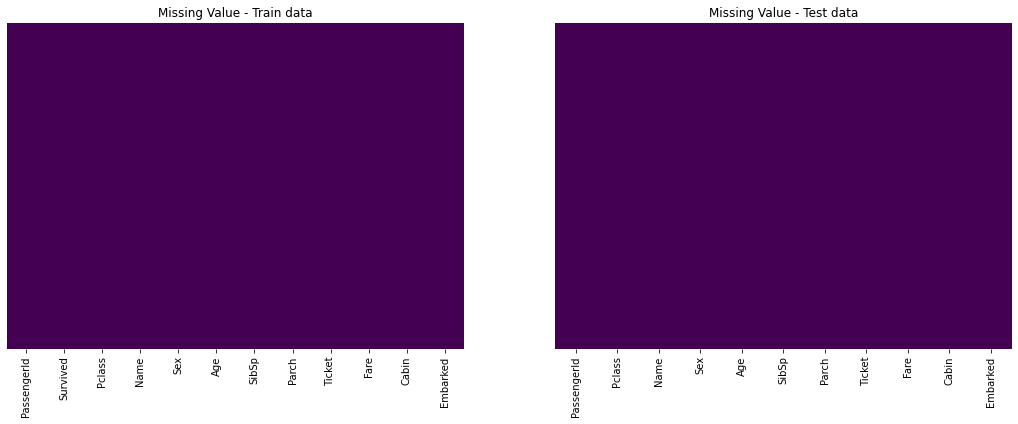

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# Train data
sns.heatmap(titanic_train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Missing Value - Train data')

# Test data
sns.heatmap(titanic_test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Missing Value - Test data')

plt.show()

## Display the Prepared Data

In [26]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [27]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


## Save the cleaned data sets

In [28]:
titanic_train.to_csv('Datasets/Cleaned/cleaned_train.csv')
titanic_test.to_csv('Datasets/Cleaned/cleaned_test.csv')

---

# <h1 align = "center">End of Data Cleaning</h1>